In [2]:
import rasterio
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


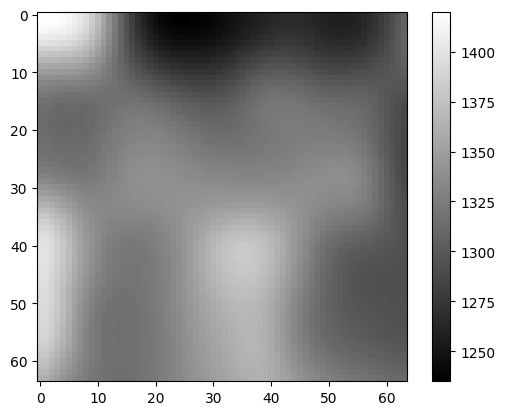

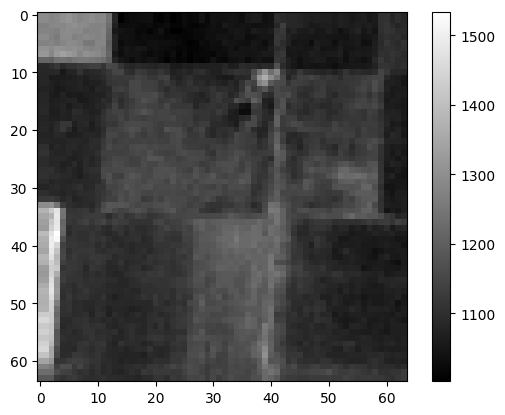

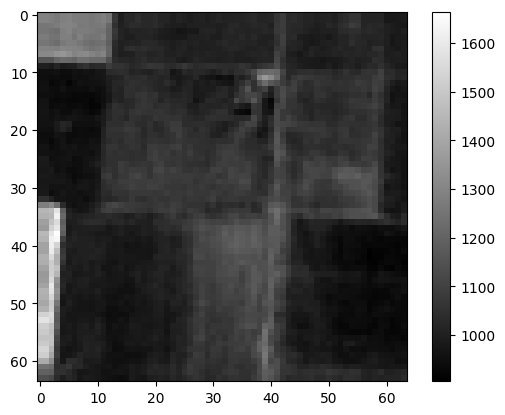

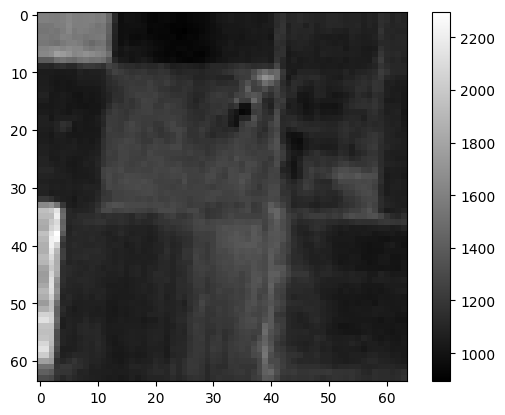

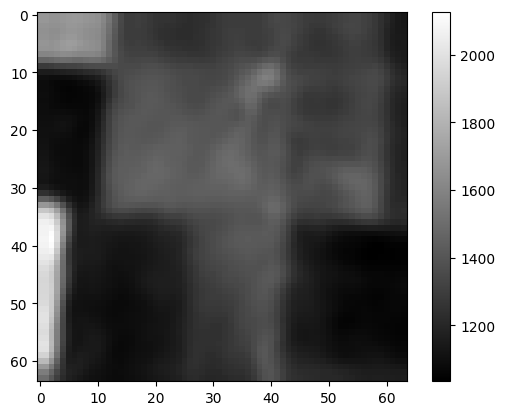

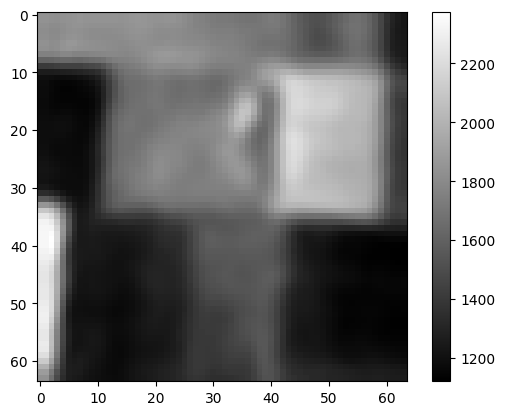

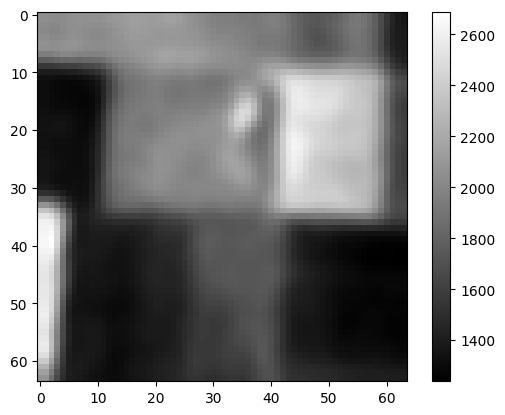

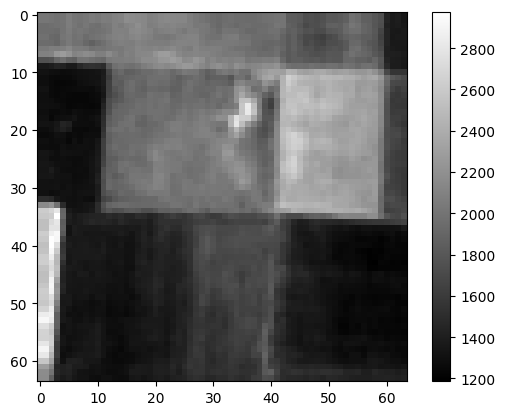

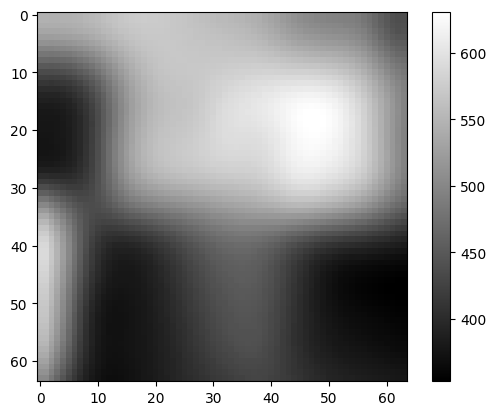

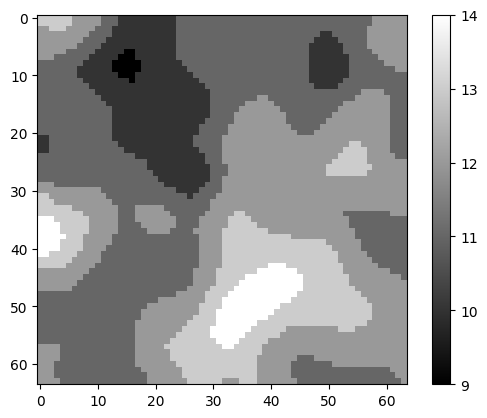

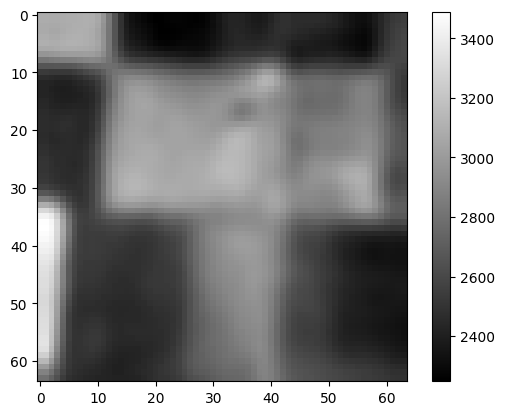

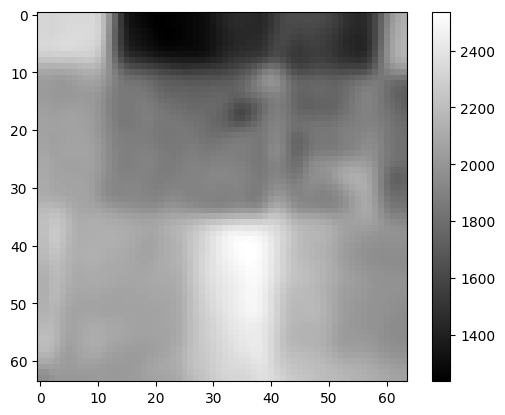

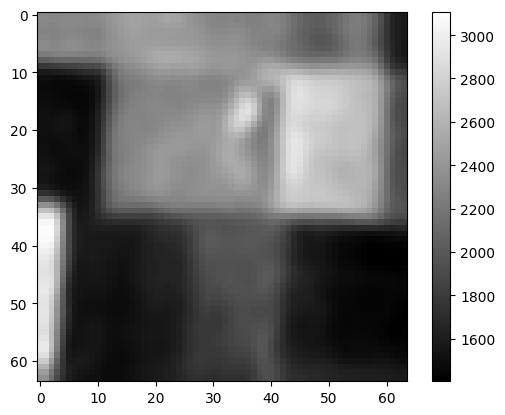

driver : GTiff
dtype : uint16
nodata : None
width : 64
height : 64
count : 13
crs : EPSG:32635
transform : | 10.01, 0.00, 624602.23|
| 0.00,-9.99, 4877286.03|
| 0.00, 0.00, 1.00|
2030.545166015625
1


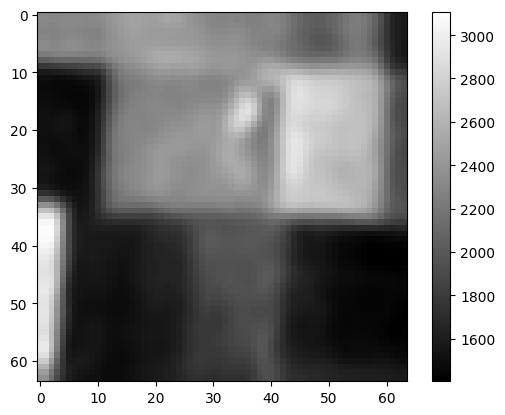

In [3]:
with rasterio.open(r"C:\Users\Azista Industries\OneDrive\Desktop\2672024\EuroSAT_MS\AnnualCrop\AnnualCrop_1.tif") as src:
    for i in range(1,src.count+1):
        data = src.read(i)
        plt.imshow(data, cmap='gray')
        plt.colorbar()
        plt.show()
    metadata = src.meta
    for i in metadata:
        print(i + ' : ' + str(metadata[i]))
    color_interpretation = src.colorinterp[0]
    mean = np.mean(data)
print(mean)
print(color_interpretation)

plt.imshow(data, cmap='gray')
plt.colorbar()
plt.show()

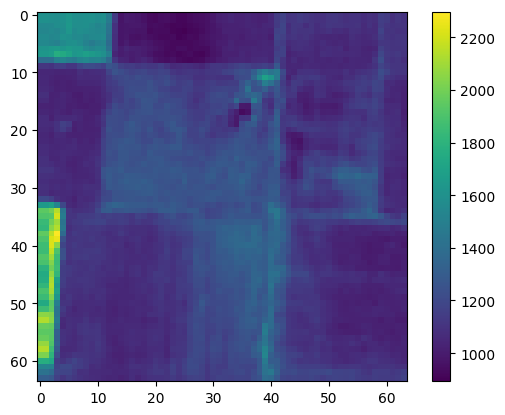

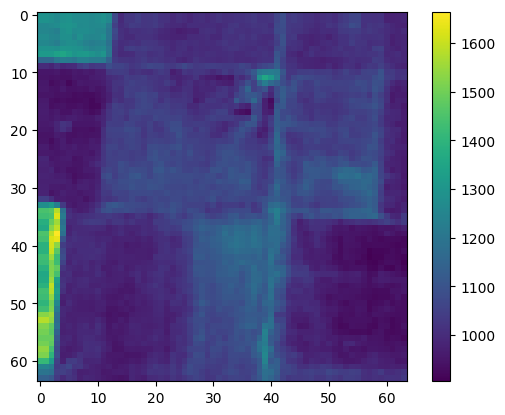

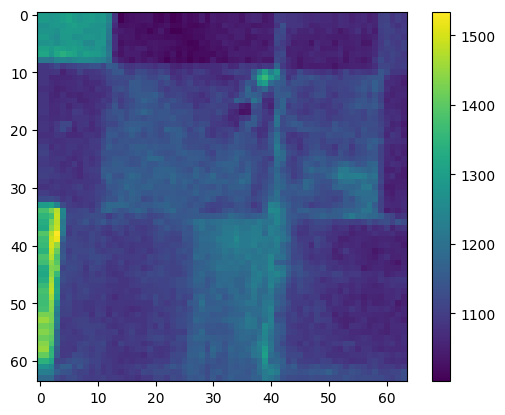

In [17]:
with rasterio.open(r"C:\Users\Azista Industries\OneDrive\Desktop\2672024\EuroSAT_MS\AnnualCrop\AnnualCrop_1.tif") as src:
    r = src.read(4)#.astype('uint8')
    g = src.read(3)#.astype('uint8')
    b = src.read(2)#.astype('uint8')
    nir = src.read(8)
for i in [r,g,b]:
    plt.imshow(i)
    plt.colorbar()
    plt.show()

In [18]:
rgb=np.stack([r,g,b],axis=-1)
img = np.dstack((r,g,b))
cv.imshow("rgb",img)
cv.waitKey(0)
cv.destroyAllWindows()
# plt.figure(figsize=(20,20))
# plt.imshow(img)

In [6]:
def calNDVI(nir,r):
    NDVI=(nir-r)/(nir+r)
    return NDVI


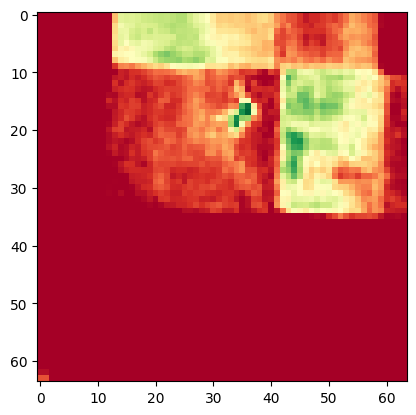

In [38]:

ndvi = np.clip(calNDVI(nir,r),0.2,1)
# ndvi = calNDVI(nir, r)
# plt.imshow(ndvi)#, cmap='RdYlGn')
# cv.imshow("rgb",ndvi)
# cv.waitKey(0)
# cv.destroyAllWindows()
plt.imshow(ndvi, cmap='RdYlGn')